In [1]:
import matplotlib.pyplot as plt
import numpy as np
from snaptools import snapio
import timeit
%matplotlib inline

In [2]:
folder = '/usr/data/coors2/spardy/hpc_backup/working/Gas/Dehnen_LMC/collisions_best/output_Dehnen_smc_45deg/'
snap = snapio.load_snap("{:s}snap_{:03d}.hdf5".format(folder, 0))

In [11]:
def measure_fourier(r, theta, length, BINS_r, BINS_theta):

    Z2, x, y = np.histogram2d(r, theta, range=[[0, length],
                                               [-np.pi, np.pi]],
                              bins=[BINS_r, BINS_theta],
                              normed=False)

    sinrange = np.zeros((BINS_theta, 10))
    cosrange = np.zeros((BINS_theta, 10))

    theta_range = np.linspace(-np.pi, np.pi, BINS_theta)
    for i in xrange(10):
        cosrange[:, i] = np.cos(i*theta_range)
        sinrange[:, i] = np.sin(i*theta_range)

    I0 = np.zeros(BINS_r)
    for i in xrange(BINS_r):
        I0[i] = np.mean(Z2[i, :])

    Imc = np.zeros((BINS_r, 10))
    Ims = np.zeros((BINS_r, 10))
    for j in xrange(10):
        for i in xrange(BINS_r):
            Ims[i, j] = 2*np.mean(Z2[i, :]*sinrange[:, j])
            Imc[i, j] = 2*np.mean(Z2[i, :]*cosrange[:, j])

    am = np.zeros((BINS_r, 10))
    for j in xrange(10):
        am[I0 > 0, j] = np.sqrt(Imc[I0 > 0, j]**2
                                +Ims[I0 > 0, j]**2)/I0[I0 > 0]

    Z2_re = np.zeros_like(Z2)
    for i in xrange(BINS_r):
        for j, (s, c) in enumerate(zip(sinrange, cosrange)):
            Z2_re[i, j] = I0[i] + np.sum(Imc[i, :]*s) + np.sum(Ims[i, :]*c) 
        
    return am, Z2_re

def measure_fourier_old(r, theta, length, BINS_r, BINS_theta):

    Z2, x, y = np.histogram2d(r, theta, range=[[0, length],
                                               [-np.pi, np.pi]],
                              bins=[BINS_r, BINS_theta],
                              normed=False)

    sinrange = np.zeros((BINS_theta, 10))
    cosrange = np.zeros((BINS_theta, 10))

    theta_range = np.linspace(-np.pi, np.pi, BINS_theta)
    for i in xrange(10):
        cosrange[:, i] = np.cos(i*theta_range)
        sinrange[:, i] = np.sin(i*theta_range)

    I0 = np.zeros(BINS_r)
    for i in xrange(BINS_r):
        I0[i] = np.mean(Z2[i, :])

    Imc = np.zeros((BINS_r, 10))
    Ims = np.zeros((BINS_r, 10))
    for i in xrange(BINS_r):
        for j in xrange(10):
            Ims[i, j] = np.mean(Z2[i, :]*sinrange[:, j])
            Imc[i, j] = np.mean(Z2[i, :]*cosrange[:, j])

    am = np.zeros((BINS_r, 10))
    for j in xrange(10):
        am[I0 > 0, j] = np.sqrt(Imc[I0 > 0, j]**2
                                +Ims[I0 > 0, j]**2)/I0[I0 > 0]

    Z2_re = np.zeros_like(Z2)
    for i in xrange(BINS_r):
        for j, (s, c) in enumerate(zip(sinrange, cosrange)):
            Z2_re[i, j] = I0[i] + np.sum(Imc[i, :]*s) + np.sum(Ims[i, :]*c) 
        
    return am, Z2_re




In [12]:
lengthX = 10
parttype = 'stars'
BINS_r = 128
pos = snap.pos[parttype]
com1, com2, gal1id, gal2id = snap.center_of_mass(parttype)
x_cent, y_cent, z_cent = com1
px2 = pos[gal1id, 0]-x_cent
py2 = pos[gal1id, 1]-y_cent
r = np.sqrt(px2**2+py2**2)
theta = np.arctan2(px2, py2)
amold, Z2_re_old = measure_fourier_old(r, theta, lengthX, BINS_r, 360)
amnew, Z2_re_new = measure_fourier(r, theta, lengthX, BINS_r, 360)


In [13]:
print np.sum(amold, axis=1)[:20]
print np.sum(amnew, axis=1)[:20]

[ 1.15270023  1.17858191  1.20457931  1.2822923   1.35376475  1.40294311
  1.494962    1.52877352  1.61210954  1.67248812  1.72533424  1.76532796
  1.77829096  1.85103973  1.83656471  1.82143238  1.85893431  1.83293603
  1.84559964  1.87847972]
[ 2.30540046  2.35716382  2.40915862  2.56458459  2.70752951  2.80588622
  2.989924    3.05754705  3.22421909  3.34497625  3.45066847  3.53065592
  3.55658193  3.70207946  3.67312941  3.64286477  3.71786862  3.66587206
  3.69119927  3.75695944]


In [6]:
am = measure_fourier_new(r, theta, lengthX, BINS_r, 360)

In [8]:
am.shape

(128, 360)

In [14]:
Z2, x, y = np.histogram2d(r, theta, range=[[0, lengthX],
                                           [-np.pi, np.pi]],
                          bins=[BINS_r, 360],
                          normed=False)

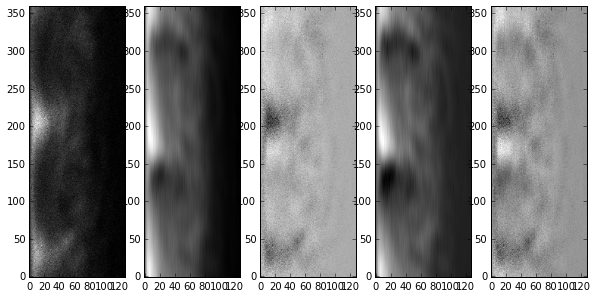

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
axes[0].imshow(Z2.T, origin='lower', cmap='gray')

axes[1].imshow(Z2_re_old.T, origin='lower', cmap='gray')
axes[2].imshow((Z2_re_old.T-Z2.T), origin='lower', cmap='gray')

axes[3].imshow(Z2_re_new.T, origin='lower', cmap='gray')
axes[4].imshow((Z2_re_new.T-Z2.T), origin='lower', cmap='gray')
